## **Setup Init**

In [152]:
# importing python library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Analyze Data**

In [3]:
# load the data
df = pd.read_csv('../../../Purwadhika/Project/Capstone Project 2/cleaned_data.csv', engine='pyarrow').set_index('')
df.sample(5)

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,kategori_penumpang
,,,,,,,
79,2021,1,Mikrotrans,JAK.71,Kampung Rambutan - Pinang Ranti,62822,Ramai Penumpang
1287,2021,11,Mikrotrans,JAK.40,Harapan Baru - Pulo Gebang via Rawa Kuning,47573,Ramai Penumpang
894,2021,8,Mikrotrans,JAK.17,Senen - Pulo Gadung,31113,Sepi penumpang
463,2021,4,Mikrotrans,JAK.07,Tanah Abang - Grogol via Tawakal,53720,Ramai Penumpang
1299,2021,11,Mikrotrans,JAK.71,Kampung Rambutan - Pinang Ranti,65152,Ramai Penumpang


### Trend Jumlah Penumpang Pulo Gadung 2021

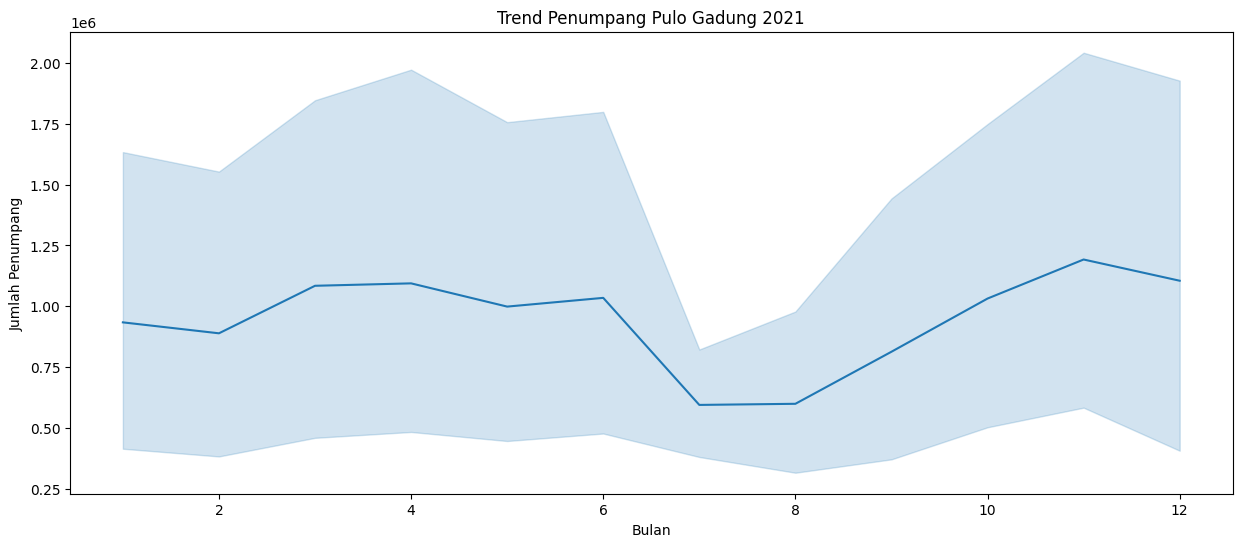

In [49]:
# Line Plot
plt.figure(figsize=(15,6))
sns.lineplot(x='bulan', y='jumlah_penumpang', data=df[df.trayek.str.contains('Pulo Gadung')], estimator='sum')
plt.title("Trend Penumpang Pulo Gadung 2021")
plt.ylabel("Jumlah Penumpang")
plt.xlabel("Bulan")
plt.show()

Grafik diatas merupakan jumlah penumpang yang menggunakan semua jenis tranportasi Transjakarta pada tahun 2021, dapat kita lihat bahwa:
- Jumlah penumpang mengalami penurunan drastis pada bulan Juni 2021. Penurunan ini disebebakan oleh adanya PPKM karena meningkatnya jumlah masyarakat yang terinfeksi virus corona.
- Pada bulan Juli 2021 mengalami sedikit kenaikan penumpang dibandingkan bulan Juni 2021 walaupun tidak terlalu terlihat.
- Mulai dari bulan Agustus 2021 sudah mengalami peningkatan jumlah penumpang yang drastis dengan puncak tertinggi terjadi pada bulan November. Bulan November 2021 juga menjadi jumlah penumpang tertinggi sepanjang tahun 2021.

### Jenis Transportasi yang Diminati

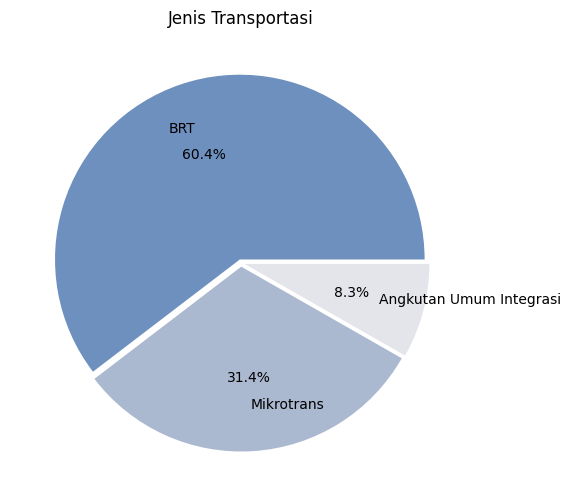

Text(0.5, 0, 'Bulan')

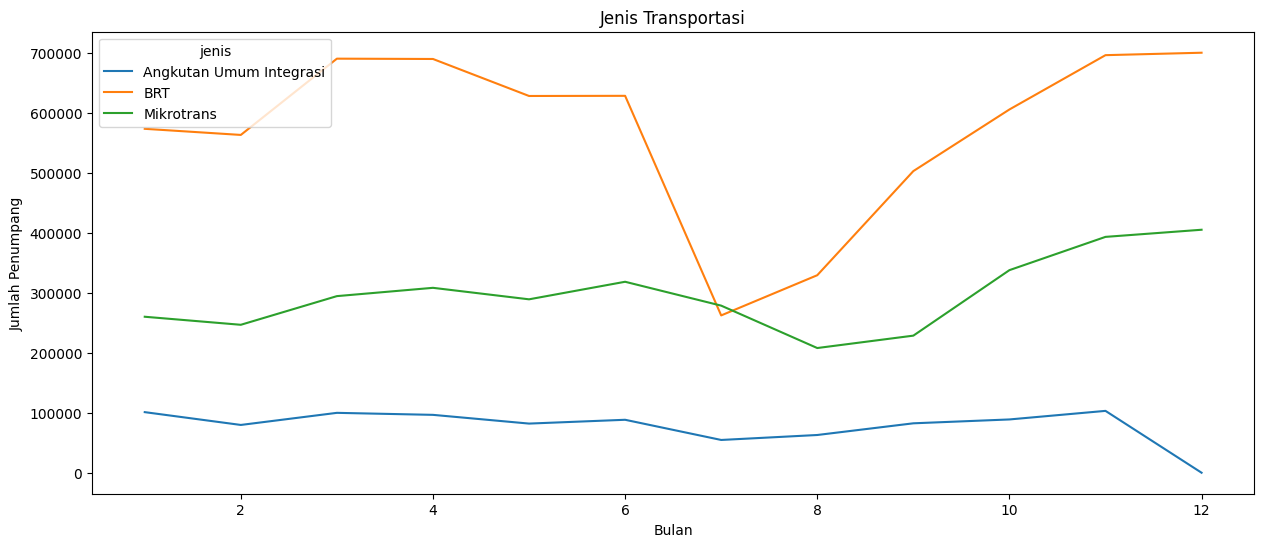

In [201]:
# Jumlah jenis transport yang diminati
transportType = df[df.trayek.str.contains('Pulo Gadung')].groupby('jenis')['jumlah_penumpang'].sum().sort_values(ascending=False)

# Pie Plot
plt.figure(figsize=(10,6))
plt.pie(transportType.values, 
        labels = transportType.index, 
        autopct='%1.1f%%', 
        explode=[0.02]*len(transportType),
        colors = sns.color_palette("vlag"),
        labeldistance=0.75)
plt.title("Jenis Transportasi")
plt.show()

# Line Plot
dfMonth = pd.DataFrame(df[df.trayek.str.contains('Pulo Gadung')].groupby(['bulan', 'jenis'])['jumlah_penumpang'].sum().reset_index())
plt.figure(figsize=(15,6))
sns.lineplot(data= dfMonth,
            x='bulan',
            y= 'jumlah_penumpang',
            hue='jenis')
plt.title("Jenis Transportasi")
plt.ylabel("Jumlah Penumpang")
plt.xlabel("Bulan")

Grafik diatas menunjukkan jenis transportasi yang diminati berdasarkan jumlah penumpang Transjakarta pada tahun 2021, dapat kita lihat bahwa:
- Jenis transportasi yang memiliki jumlah penumpang paling banyak yaitu BRT dengan presentasi 60.4% dan diikuti mikrotrans sebanyak 31.4%.
- Jumlah penumpang setiap jenis transportasi juga mengalami penurunan pada bulan Juni 2021 dikarenakan diberlakukannya PPKM di seluruh Indonesia. Tetapi setelah bulan Agustus 2021, jumlah penumpang mulai mengalami peningkatan secara keseluruhan berdasarkan jenis transportasi yang ada.
- Puncak tertinggi jumlah penumpang terjadi pada bulan November 2021 disetiap jenis transportasi. Ini menandakan respon positif masyarakat dalam mengggunakan transportasi umum.

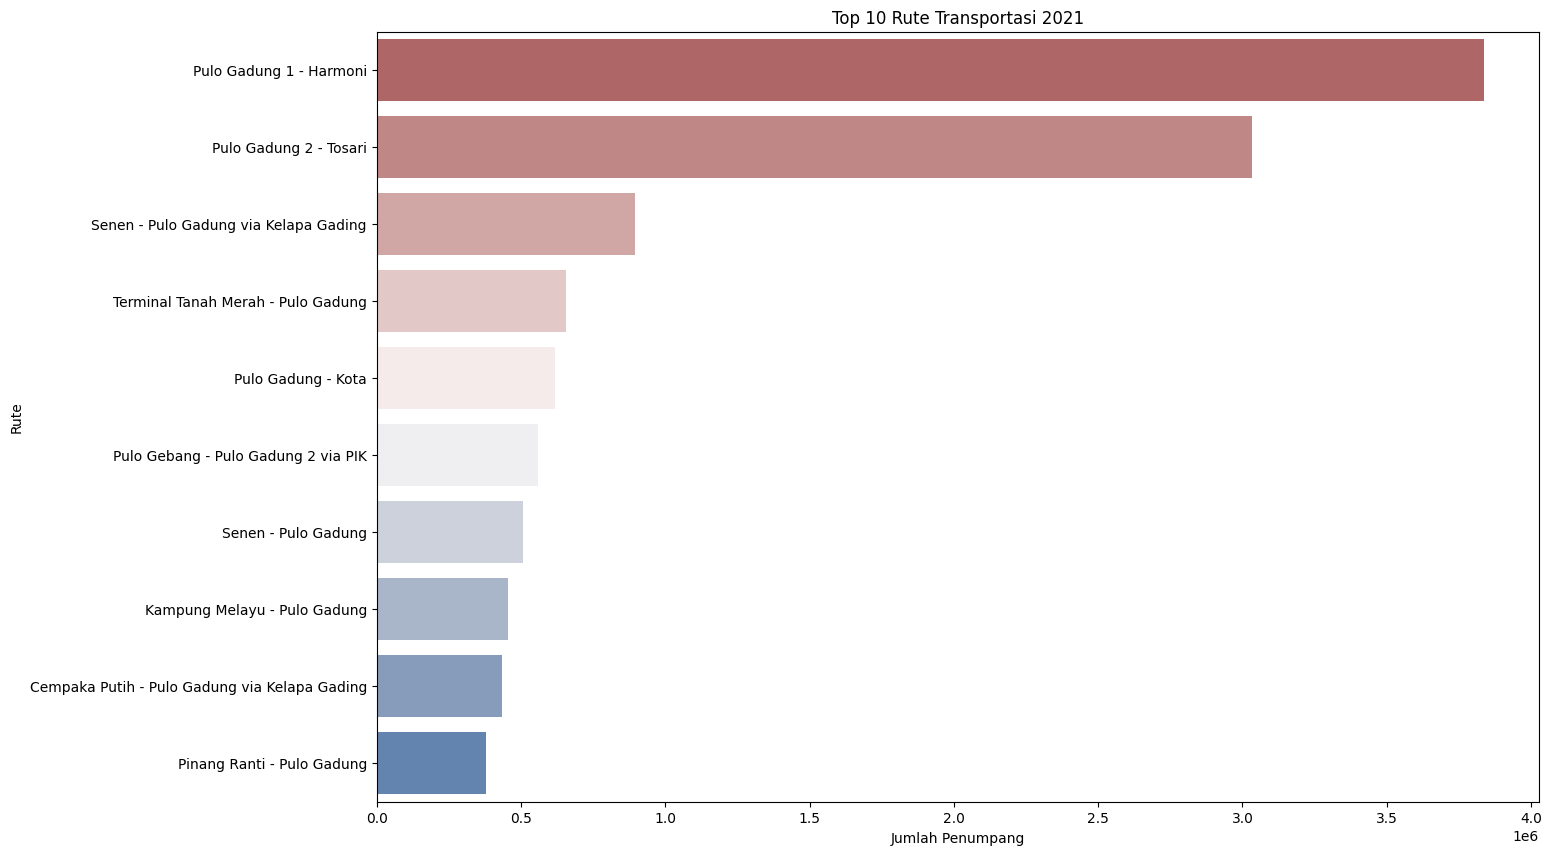

In [196]:
# Rute Pulo Gadung paling diminati
routePuloGadung = df[df.trayek.str.contains('Pulo Gadung')].groupby('trayek')['jumlah_penumpang'].sum().sort_values(ascending=False)

# Bar Plot
plt.figure(figsize=(15,10))
pal = sns.color_palette("vlag", 10)
sns.barplot(x=routePuloGadung.values[:10], 
            y=routePuloGadung.index[:10],
            palette=np.array(pal[::-1]))
plt.title("Top 10 Rute Transportasi 2021")
plt.xlabel("Jumlah Penumpang")
plt.ylabel("Rute")
plt.xticks(rotation=0)
plt.show()

Grafik diatas menunjukkan 10 rute paling ramai berdasarkan jumlah penumpang yang ada di Transjakarta pada tahun 2021, dapat kita lihat bahwa:
- Rute yang memiliki jumlah penumpang paling banyak yaitu rute Pulo Gadung - Kota dengan jumlah penumpang hampir mencapai 4 juta.
- Rute kedua tertinggi diraih oleh rute Pulo Gadung 2- Tosari dengan jumlah penumpang 3 juta.


### Rute Berdasarkan Jenis Transportasi

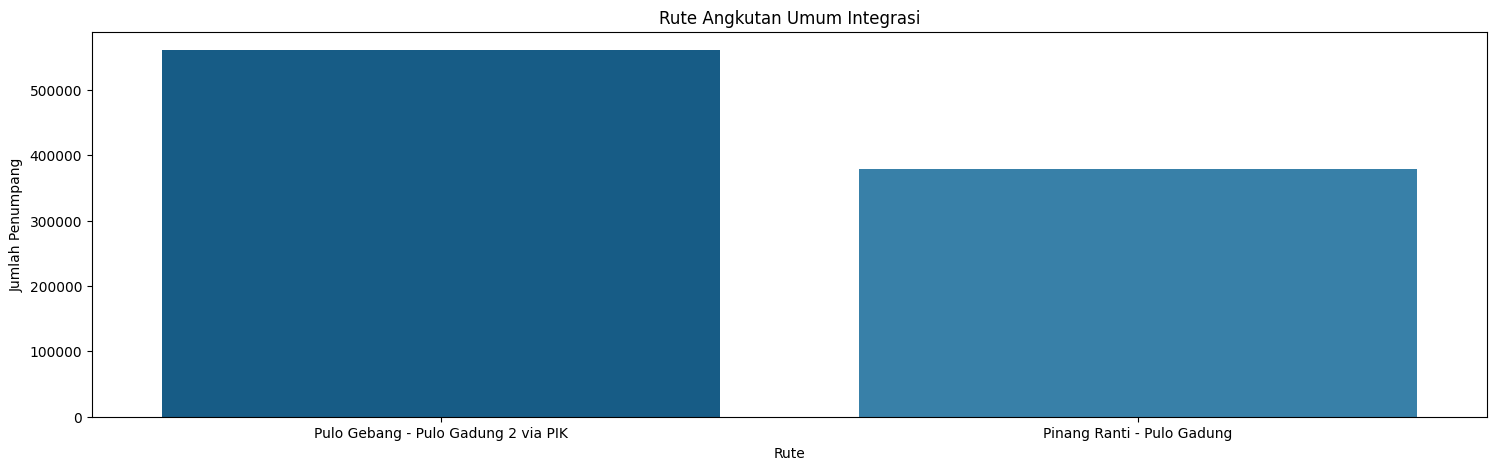

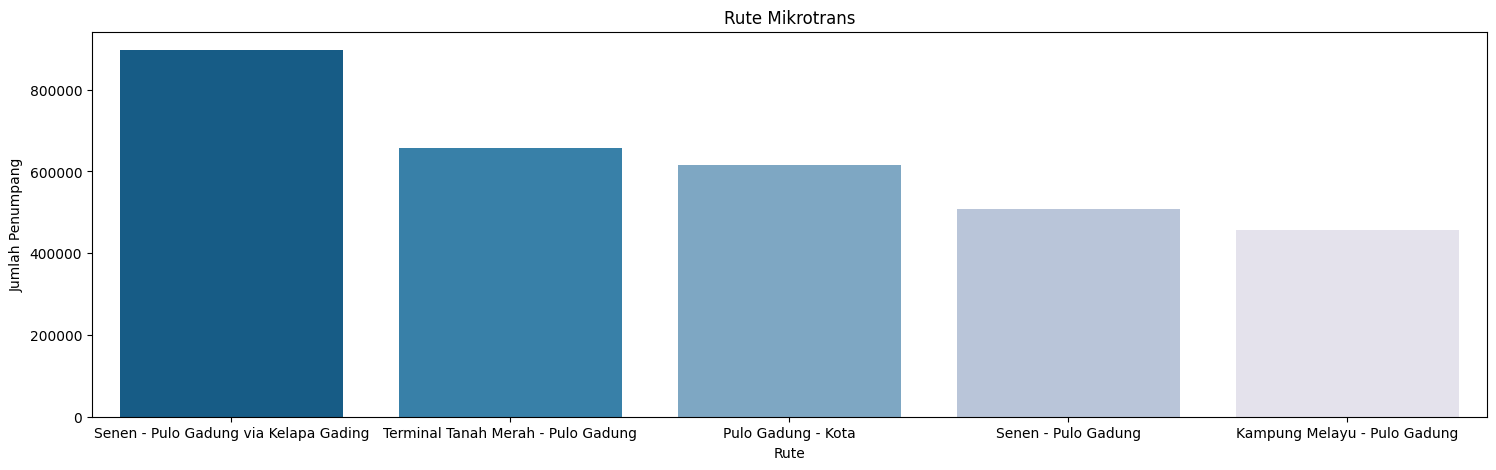

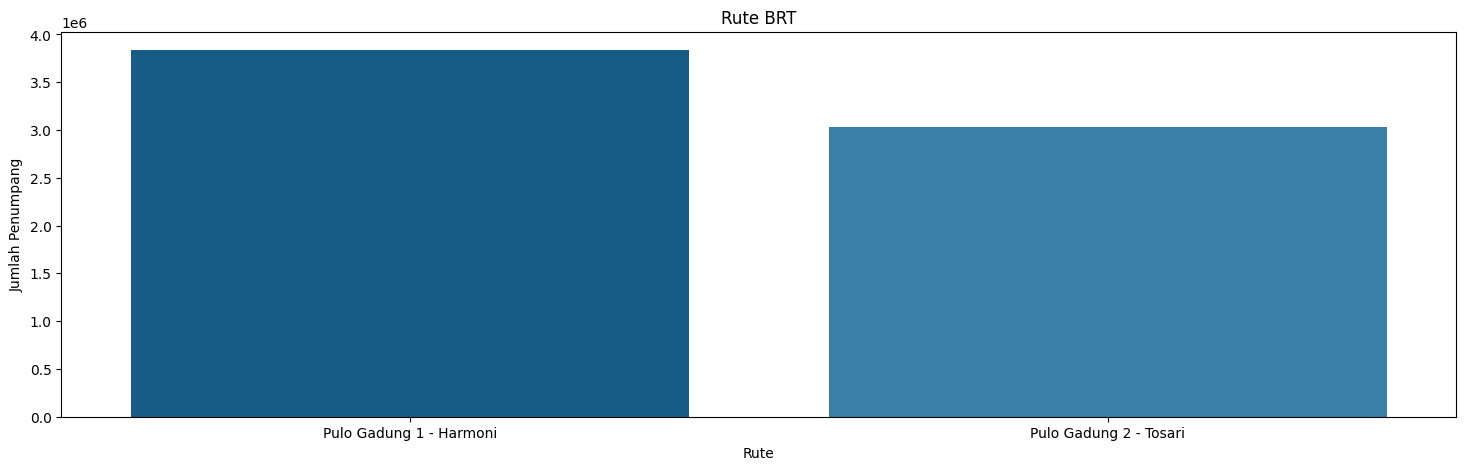

In [197]:
# Rute dan Jenis paling diminati
routeType = pd.DataFrame(df[df.trayek.str.contains('Pulo Gadung')].groupby(['jenis', 'trayek'])['jumlah_penumpang'].sum().reset_index())
routeType

# Tipe Transportasi
transTypeUniq = df[df.trayek.str.contains('Pulo Gadung')]['jenis'].unique()

# Top 5
def topTrans(transTypeUniq):
    return routeType[routeType['jenis'] == transTypeUniq].nlargest(5, 'jumlah_penumpang')

# Bar Plot
for pubTrans in transTypeUniq:
    pal = sns.color_palette("PuBu", 5)
    plt.figure(figsize=(18,5))
    top = topTrans(pubTrans)
    sns.barplot(data=top, 
                x='trayek', 
                y='jumlah_penumpang',
                palette=np.array(pal[::-1]))
    plt.title(f'Rute {pubTrans}')
    plt.xlabel('Rute')
    plt.ylabel('Jumlah Penumpang')
    plt.show()


Grafik diatas menunjukkan rute yang dibagi berdasarkan jenisnya yang mengacu pada jumlah penumpang yang ada di Transjakarta pada tahun 2021, dapat kita lihat bahwa:
- Rute jenis transportasi **Angkutan Umum Integrasi** yang melewati daerah Pulo Gadung hanya 2 dan memiliki jumlah penumpang paling sedikit dibandingkan Mikrotans yang kapasitasnya lebih besar dibandingkan Mikrotrans. Rute Angkutan Umum Integrasi Pulo Gebang - Pulo Gadung via PIK memiliki jumlah penumpang terbanyak yaitu hampir 700.000 pemumpang.
- Selain Angkutan Umum Integrasi, **BRT** juga hanya memiliki 2 rute yang melewati daerah Pulo Gadung. Tetapi, jumlah penumpang yang memilih menggunakan BRT lebih banyak dibandingkan Angkutan Umum Integrasi dengan perbandingan yang signifikan. Rute BRT Pulo gadung - Harmoni memiliki jumlah penumpang paling banyak yaitu hampir 4.000.000 penumpang.
- **Mikrotans** memiliki rute terbanyak yang melewati daerah Pulo Gadung dan memiliki peminat yang banyak jika diingat bahwa Mikrotrans memiliki kapasitas penumpang yang sedikit. Selain itu, Mikrotrans diminati karena lebih efisien dibandingkan menggunakan bus besar seperti BRT dan Angkutan Umum Integrasi. Rute Mikrotrans Senen -  Pulo gadung via Kelapa Gading memiliki jumlah penumpang terbanyak yaitu hampir 1.000.000 pemumpang.

## **Kesimpulan**
Berdasarkan analisis data Transjakarta Passenger 2021 yang ada pada wilayah Pulo Gadung, perusahaan memiliki tigas jenis transportasi yang beroperasi pada wilayah tersebut. Jneis transportasi tersebut yaitu BRT, Mikrotrans, dan ANgkutan Umum Integrasi. BRT memiliki jumlah penumpang yang paling tinggi diantara jenis transportasi lainnya meskipun hanya memiliki 2 trayek. Ini disebabkan karena kapasitas penumpang BRT lebih besar dibandingkan jenis transportasi umum lainnya. Selain itu, Mikrotrans memiliki jumlah penumpang yang tidak sedikit jika dilihat dari kapasitas penumpangnya. Jumlah trayek Mikrotrans di wilayah Pulo Gadung juga lebih banyak dibandingkan BRT dan Angkutan Umum Integrasi yang masing masing hanya memiliki 2 rute. Secara keseluruhan jenis tranportasi mengalami penurunan pada bulan Juli-Agustus 2021 karena adanya pemberlakuan PPKM di Indonesia. Selain itu, jumlah penumpang stabil dari awal tahun dengan puncak kenaikan jumlah penumpang pada bulan November 2021.

## **Rekomendasi**
Dari pertimbangan jumlah penumpang dan trayek yang ada serta perbandingan kapasitas setiap jenisnya, Mikrotrans memiliki peluang yang paling tepat untuk dijadikan target investasi. Selain Mikrotrans, BRT juga memiliki peluang yang baik dari segi jumlah penumpang yang mencapai hampir 4 juta selama setahun pada masa Covid-19. Selain itu, investor perlu memperhatikan biaya maintenance pada masing masing jenis transportasi yang menjadi pilihan untuk dijadikan investasi. Jika memilih Mikrotrans yang akan dilakukan pengembangan, maka anggaran investasi dapat dialokasikan pada penambahan armada dengan jumlah penumpang yang padat penumpang pada trayek tertentu. Selain itu dana investasi dapat dialokasikan untuk perbaikan armada yang tidak terpakai tetapi masih layak dipakai dibandingkan membeli armada baru.